# ECS171 Final Group Project: Pizza/Not Pizza Image Classifier


## Step 1: Data Exploration
Goals for this portion of the project:
+ Data evaluation
    + Evaluate all of the photos in the dataset, cull outliers
+ Number of total observations
    + Number and list of classes, plot class data
+ Image specifications
    + Total number of images
    + Image dimensions, and whether they need to be processed to be standardized

Preliminary data evaluation:
- The pizza directory also includes images of primarily people eating pizza (and one singular photo of a baby), and not the actual food itself; they've been culled before we imported the data.
- Data cannot be downloaded from Kaggle without an account; the data has been downloaded and stored in the GitHub repo instead to simplify the process of importing the repo and directly using this notebook, at the cost of storage space (however, the data is only ~100 MB unpacked).

In [68]:
# Library imports
# The standard ones.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use the built-in Keras utility for image imports
# Based on the docs, this will infer class type from directory structure.
from keras.utils import image_dataset_from_directory

Found 1962 files belonging to 2 classes.


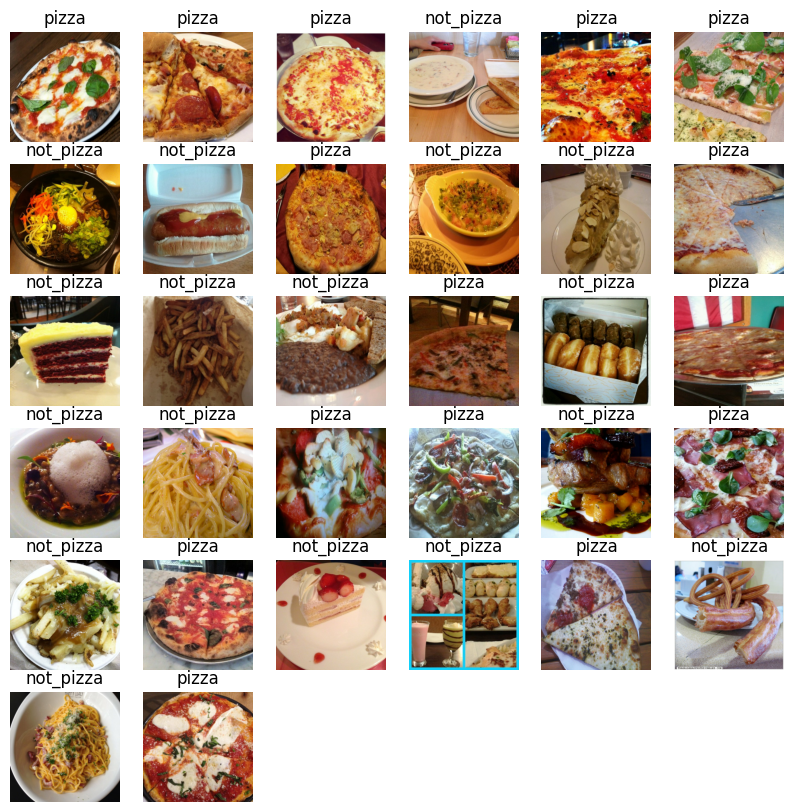

In [69]:
# From the data directory, import the images with binary numeric labels and convert to RGB (f not already)
data = image_dataset_from_directory("pizza_not_pizza", labels='inferred', label_mode='binary', color_mode='rgb')

# Following code is modified from https://www.tensorflow.org/tutorials/load_data/images#visualize_the_data
plt.figure(figsize=(10, 10))
class_names = data.class_names
for images, labels in data.take(1):
    for i in range(32): # Batch size is default of 32
        ax = plt.subplot(6, 6, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.array(labels[i])[0])])
        plt.axis("off")

Members of not_pizza: 983
Members of pizza: 979
Total # of classes: 2


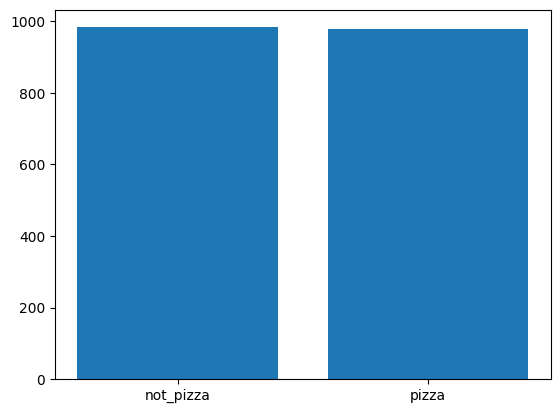

In [74]:
# Per the documents, there doesn't seem to be an easy way to get # of images per class from the dataset.
# Therefore, we can just do it ourselves the hard way — this solution assumes the OS library cannot be used.

plotLabel = [0, 0] # Not pizza, pizza
# Get all the file paths
fp = np.array(data.file_paths)
# Cull the parent directory from each string
fp = [i[16:] for i in fp]
for i in range(len(fp)):
    if fp[i].find("not_pizza") != -1:
        plotLabel[0] += 1
    else:
        plotLabel[1] += 1

plt.bar(class_names, plotLabel)
print("Members of " + class_names[0] + ": " + str(plotLabel[0]))
print("Members of " + class_names[1] + ": " + str(plotLabel[1]))
print("Total # of classes: " + str(len(class_names)))

# Image specifications
- Per the original dataset, there were 983 images of both pizza and non-pizza, meaning that the original set had a total of 1,966 photos. After our outlier check, there are now only 979 images of pizza, meaning we're currently working with 1,962 images. Furthermore, all provided photos have been resized such that one dimension of either width or height is 512 pixels, but wildly vary in the other dimension; the most consistent aspect ratio being square 1:1 photos. In this case, we can either choose to keep Keras' perservation of the full image with aspect ratio distortion, or enable cropping of the photo on import.